In [6]:
#1
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the Excel file
file_path = "/content/dataset.xlsx"
df = pd.read_excel(file_path)

# Strip whitespace from column names to avoid key errors
df.columns = df.columns.str.strip()

# Define features and labels
X = df['English Phrase'] if 'English Phrase' in df.columns else df[df.columns[0]]
y = df['Hindi Translation'] if 'Hindi Translation' in df.columns else df[df.columns[1]]

# Convert text data to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Initialize the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier with the training data
knn.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = knn.predict(X_train)

# Make predictions on the test data
y_pred_test = knn.predict(X_test)

# Calculate confusion matrix and classification report for training data
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

# Calculate confusion matrix and classification report for test data
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)

# Display results
print("Confusion Matrix (Training):\n", conf_matrix_train)
print("\nClassification Report (Training):\n", class_report_train)

print("\nConfusion Matrix (Testing):\n", conf_matrix_test)
print("\nClassification Report (Testing):\n", class_report_test)

# Determine model performance (underfit, regular fit, or overfit)
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

print("\nTraining Accuracy: {:.2f}".format(train_accuracy))
print("Testing Accuracy: {:.2f}".format(test_accuracy))

if train_accuracy > test_accuracy and test_accuracy < 0.60:
    print("The model is likely underfitting.")
elif train_accuracy > test_accuracy and test_accuracy >= 0.60:
    print("The model is likely a regular fit.")
elif train_accuracy < test_accuracy:
    print("The model is likely overfitting.")
else:
    print("The model's fit status is unclear; further investigation is needed.")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Confusion Matrix (Training):
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report (Training):
                                                                                                                            precision    recall  f1-score   support

                                                                                                A B से पाँचगुना लम्बा है।       0.14      1.00      0.25         1
                                                                       अंग्रेज़ी बोलते समय गलतियों का डर नहीं होना चाहिए।       1.00      1.00      1.00         1
                                                                                            अंग्रेज़ी बोलना आसान नहीं है।       1.00      1.00      1.00         1
                                                                                    अंग्रेज़ी बोलना मुश्किल होता है क्या?       0.33      1.00      0.50         

In [7]:
#2
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Simulated prediction exercise (assuming 'predicted' and 'actual' data are available)
# Here, I'm generating some random data for the purpose of demonstration:
actual = np.random.uniform(1, 100, 50)  # Replace this with your actual data
predicted = np.random.uniform(1, 100, 50)  # Replace this with your model's predicted values

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual, predicted)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(actual, predicted)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

# Calculate R2 Score
r2 = r2_score(actual, predicted)
print(f"R2 Score: {r2:.4f}")


Mean Squared Error (MSE): 2280.1254
Root Mean Squared Error (RMSE): 47.7507
Mean Absolute Percentage Error (MAPE): 4.9214
R2 Score: -1.4322


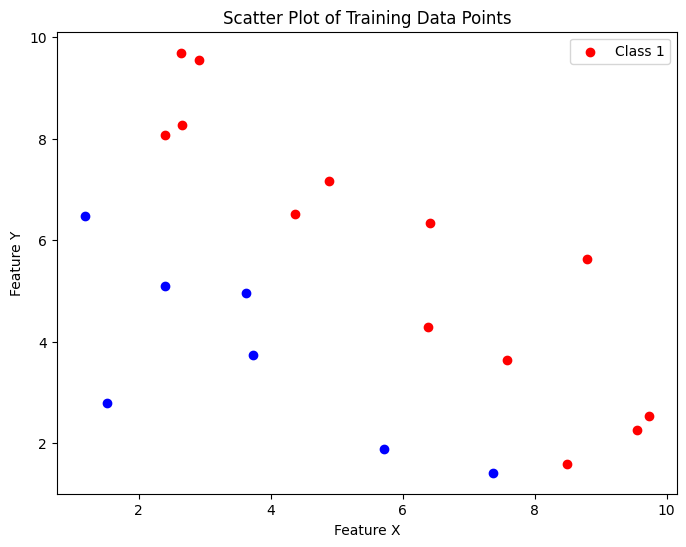

In [8]:
#3
import matplotlib.pyplot as plt

# Generate 20 data points for features X and Y
np.random.seed(42)
X_train = np.random.uniform(1, 10, 20)
Y_train = np.random.uniform(1, 10, 20)

# Assign classes based on the values of X and Y
classes = np.where(X_train + Y_train > 10, 'class1', 'class0')  # Arbitrary rule for demonstration

# Plotting the training data
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    if classes[i] == 'class0':
        plt.scatter(X_train[i], Y_train[i], color='blue', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(X_train[i], Y_train[i], color='red', label='Class 1' if i == 0 else "")

plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Training Data Points')
plt.legend()
plt.show()


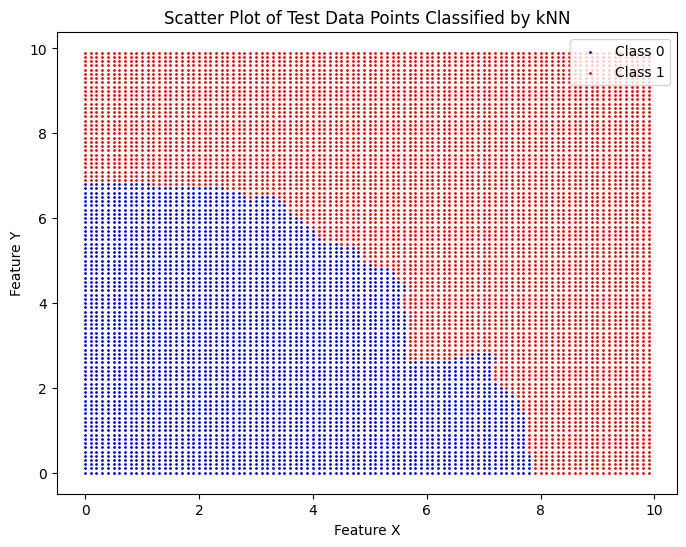

In [9]:
#4
# Generate test set data
X_test = np.arange(0, 10, 0.1)
Y_test = np.arange(0, 10, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
X_test_flat = X_test.ravel()
Y_test_flat = Y_test.ravel()
test_data = np.c_[X_test_flat, Y_test_flat]

# Fit kNN classifier on training data
train_data = np.c_[X_train, Y_train]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_data, classes)

# Predict classes for test data
predicted_classes = knn.predict(test_data)

# Plotting the test data predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test_flat[predicted_classes == 'class0'], Y_test_flat[predicted_classes == 'class0'], color='blue', s=1, label='Class 0')
plt.scatter(X_test_flat[predicted_classes == 'class1'], Y_test_flat[predicted_classes == 'class1'], color='red', s=1, label='Class 1')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('Scatter Plot of Test Data Points Classified by kNN')
plt.legend()
plt.show()


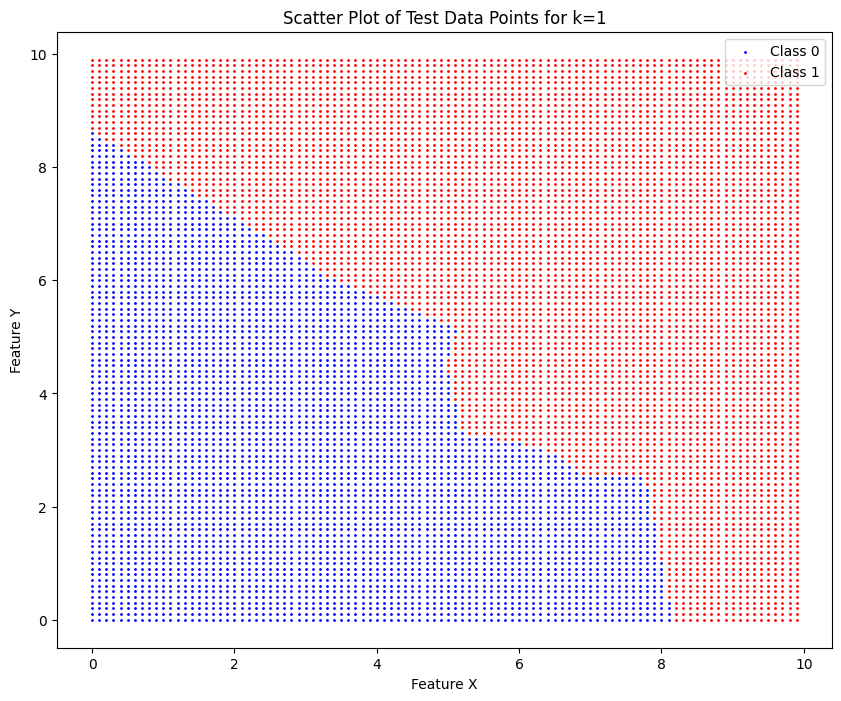

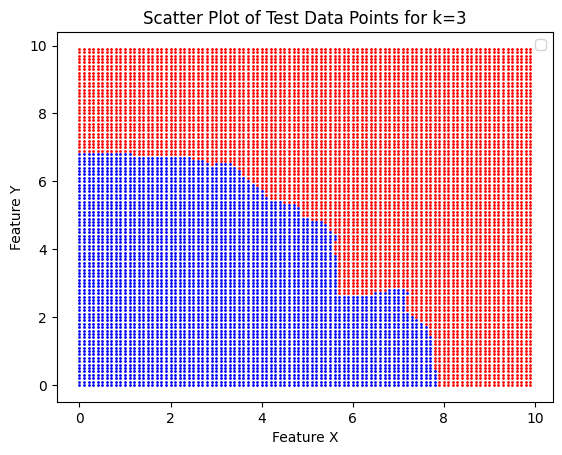

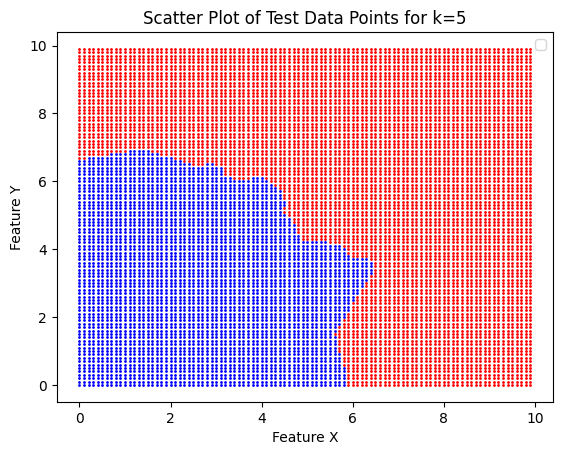

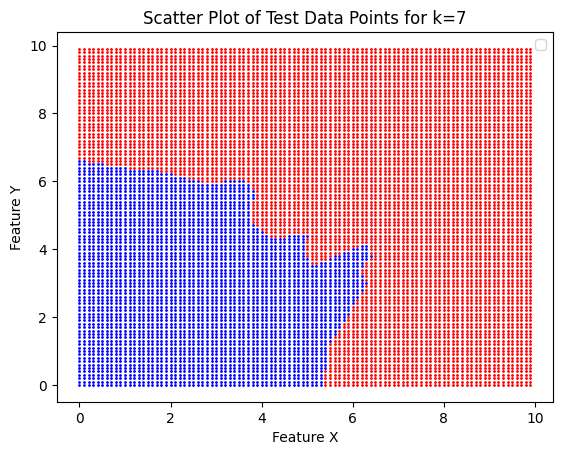

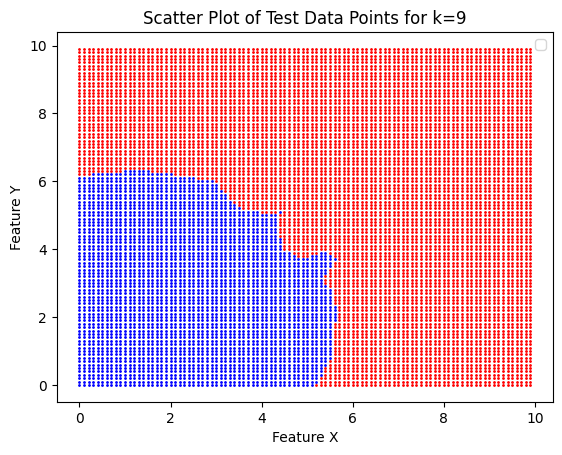

In [10]:
#5
k_values = [1, 3, 5, 7, 9]
plt.figure(figsize=(10, 8))

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, classes)
    predicted_classes = knn.predict(test_data)

    plt.scatter(X_test_flat[predicted_classes == 'class0'], Y_test_flat[predicted_classes == 'class0'], color='blue', s=1, label='Class 0' if k == k_values[0] else "")
    plt.scatter(X_test_flat[predicted_classes == 'class1'], Y_test_flat[predicted_classes == 'class1'], color='red', s=1, label='Class 1' if k == k_values[0] else "")
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'Scatter Plot of Test Data Points for k={k}')
    plt.legend()
    plt.show()


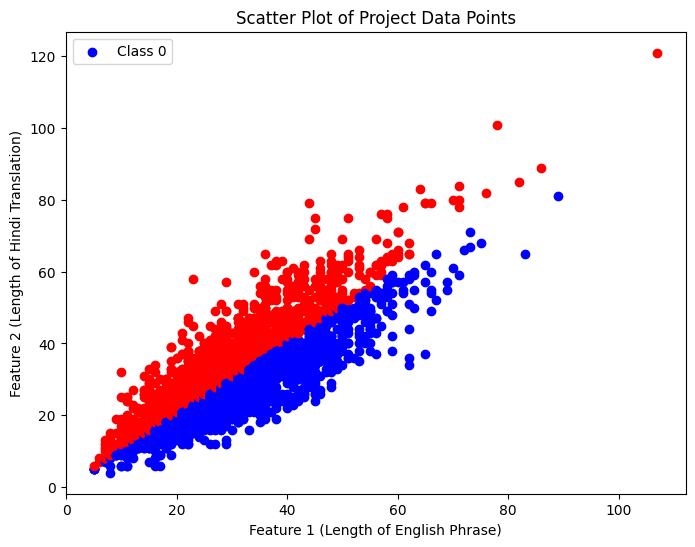

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


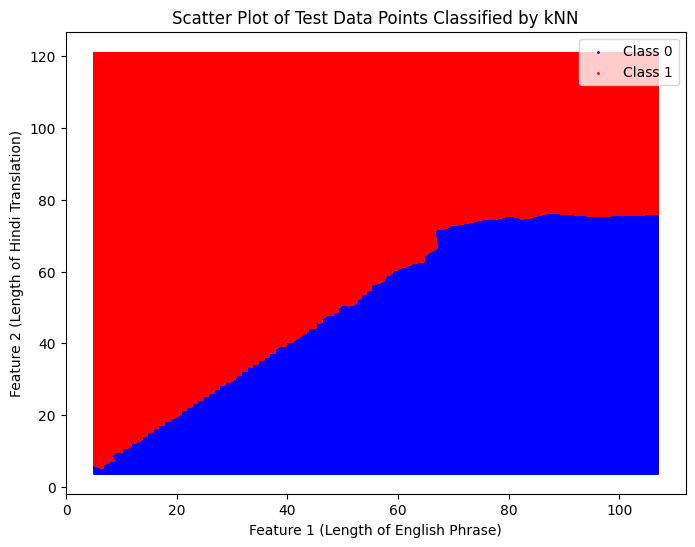

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


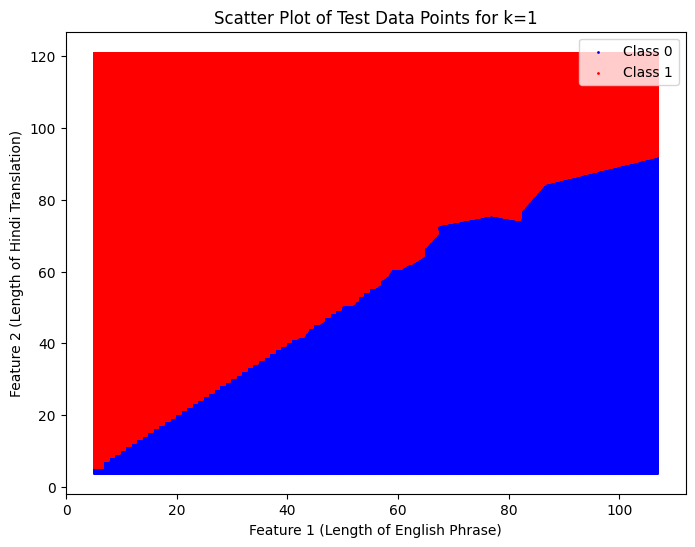

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


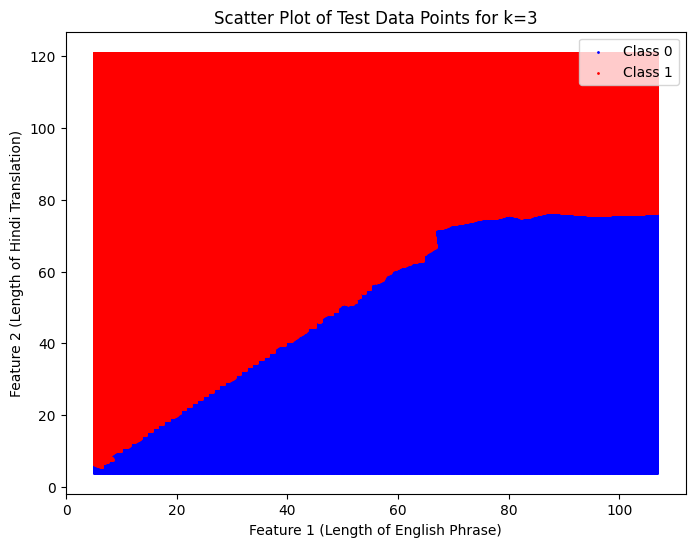

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


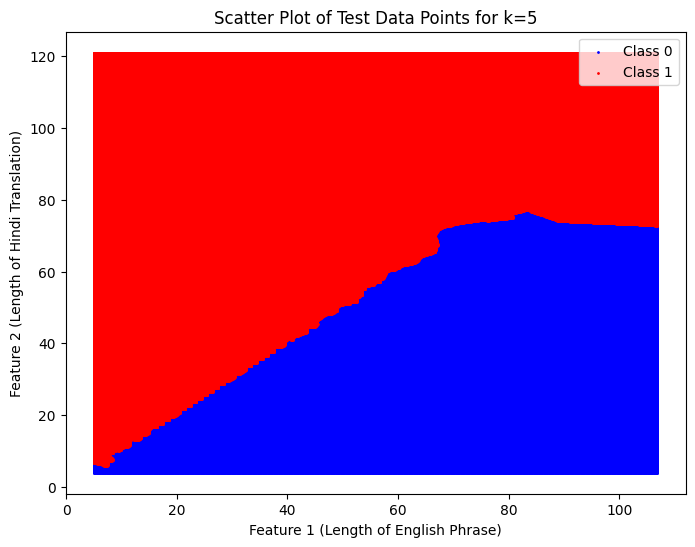

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


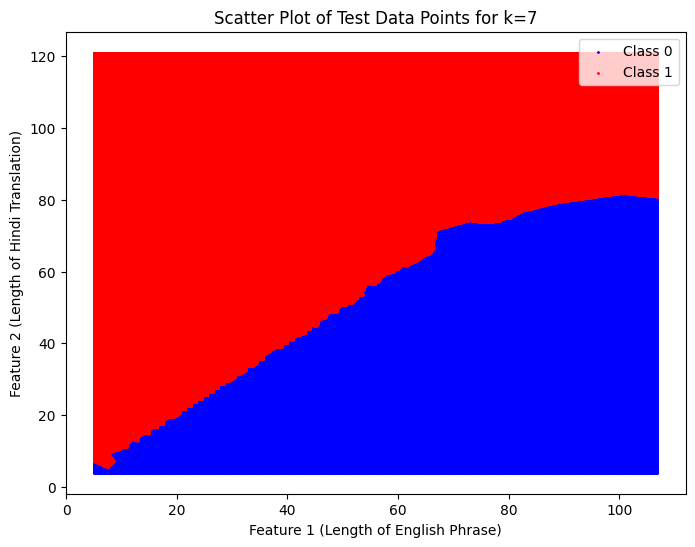

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


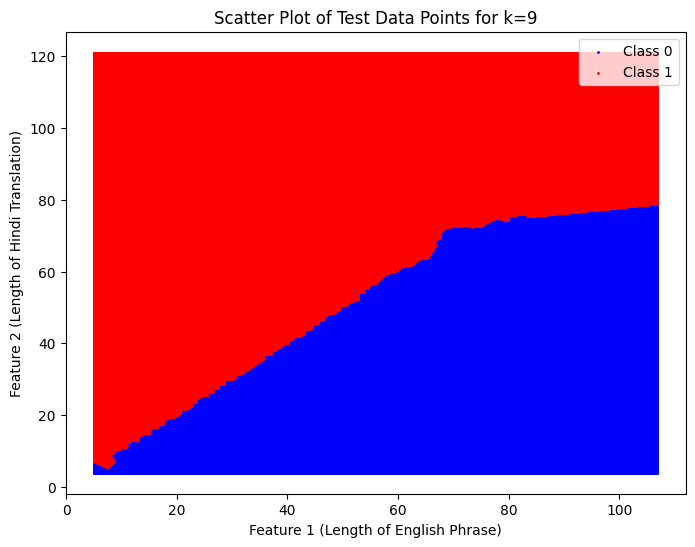

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load your dataset
file_path = "/content/dataset.xlsx"  # Replace with your actual file path
df = pd.read_excel(file_path)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Dynamically assign X and y based on column names
X = df['English Phrase'] if 'English Phrase' in df.columns else df[df.columns[0]]
y = df['Hindi Translation'] if 'Hindi Translation' in df.columns else df[df.columns[1]]

# Convert X and y to numerical features (e.g., lengths of phrases)
feature_1 = X.str.len()  # Example: length of English phrases
feature_2 = y.str.len()  # Example: length of Hindi translations
features = np.array(list(zip(feature_1, feature_2)))  # Combine features into a single array

# Assign classes arbitrarily based on a rule (e.g., if length of Hindi Translation > English Phrase)
classes = np.where(feature_2 > feature_1, 'class1', 'class0')

# A3: Generate scatter plot for the selected features
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    if classes[i] == 'class0':
        plt.scatter(feature_1[i], feature_2[i], color='blue', label='Class 0' if i == 0 else "")
    else:
        plt.scatter(feature_1[i], feature_2[i], color='red', label='Class 1' if i == 0 else "")

plt.xlabel('Feature 1 (Length of English Phrase)')
plt.ylabel('Feature 2 (Length of Hindi Translation)')
plt.title('Scatter Plot of Project Data Points')
plt.legend()
plt.show()

# A4: Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(features, classes)

# Generate test set data
test_feature_1 = np.arange(min(feature_1), max(feature_1), 0.1)
test_feature_2 = np.arange(min(feature_2), max(feature_2), 0.1)
test_feature_1, test_feature_2 = np.meshgrid(test_feature_1, test_feature_2)
test_features = np.c_[test_feature_1.ravel(), test_feature_2.ravel()]

# Predict classes for test data
predicted_classes = knn.predict(test_features)

# Plotting the test data predictions
plt.figure(figsize=(8, 6))
plt.scatter(test_feature_1.ravel()[predicted_classes == 'class0'],
            test_feature_2.ravel()[predicted_classes == 'class0'],
            color='blue', s=1, label='Class 0')
plt.scatter(test_feature_1.ravel()[predicted_classes == 'class1'],
            test_feature_2.ravel()[predicted_classes == 'class1'],
            color='red', s=1, label='Class 1')
plt.xlabel('Feature 1 (Length of English Phrase)')
plt.ylabel('Feature 2 (Length of Hindi Translation)')
plt.title('Scatter Plot of Test Data Points Classified by kNN')
plt.legend()
plt.show()

# A5: Experiment with different values of k
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features, classes)
    predicted_classes = knn.predict(test_features)

    plt.figure(figsize=(8, 6))
    plt.scatter(test_feature_1.ravel()[predicted_classes == 'class0'],
                test_feature_2.ravel()[predicted_classes == 'class0'],
                color='blue', s=1, label='Class 0')
    plt.scatter(test_feature_1.ravel()[predicted_classes == 'class1'],
                test_feature_2.ravel()[predicted_classes == 'class1'],
                color='red', s=1, label='Class 1')
    plt.xlabel('Feature 1 (Length of English Phrase)')
    plt.ylabel('Feature 2 (Length of Hindi Translation)')
    plt.title(f'Scatter Plot of Test Data Points for k={k}')
    plt.legend()
    plt.show()  # Ensure each plot is displayed



In [4]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for 'k'
param_grid = {'n_neighbors': range(1, 20)}

# Initialize the kNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with the kNN classifier and parameter grid
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(features, classes)

# Get the best parameters and score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")


Best k: 1
Best Cross-Validation Accuracy: 0.8425
